# presentaion 

https://tome.app/ai-9478/template-product-design-review-clgyd9ay6024g1r88awqvpl40

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,accuracy_score,precision_score,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

**Customize Theme**

Notebook Color Scheme: 


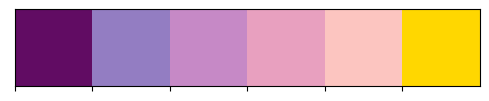

In [182]:
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#610C63", "#937DC2", "#C689C6", "#E8A0BF", "#FCC5C0", "#FFD700"]


print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

importing data

In [183]:
data=pd.read_csv('/kaggle/input/cars-purchase-decision-dataset/car_data.csv')
data=data.sample(frac=1,random_state=42)

**DATA descrip **

In [184]:
data


,User ID,Gender,Age,AnnualSalary,Purchased
521,176,Male,41,73500,0
737,448,Male,59,135500,1
740,391,Male,25,59500,0
660,623,Female,47,42500,1
411,773,Female,46,135500,0
...,...,...,...,...,...
106,398,Male,36,56500,0
270,35,Female,42,53000,0
860,626,Female,37,33000,0
435,931,Female,43,112000,1


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 46.9+ KB


In [186]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [187]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.drop('user_id',axis=1,inplace=True)
data

,gender,age,annualsalary,purchased
521,Male,41,73500,0
737,Male,59,135500,1
740,Male,25,59500,0
660,Female,47,42500,1
411,Female,46,135500,0
...,...,...,...,...
106,Male,36,56500,0
270,Female,42,53000,0
860,Female,37,33000,0
435,Female,43,112000,1


**data visualization and cleaning **

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annualsalary'}>],
       [<AxesSubplot:title={'center':'purchased'}>, <AxesSubplot:>]],
      dtype=object)

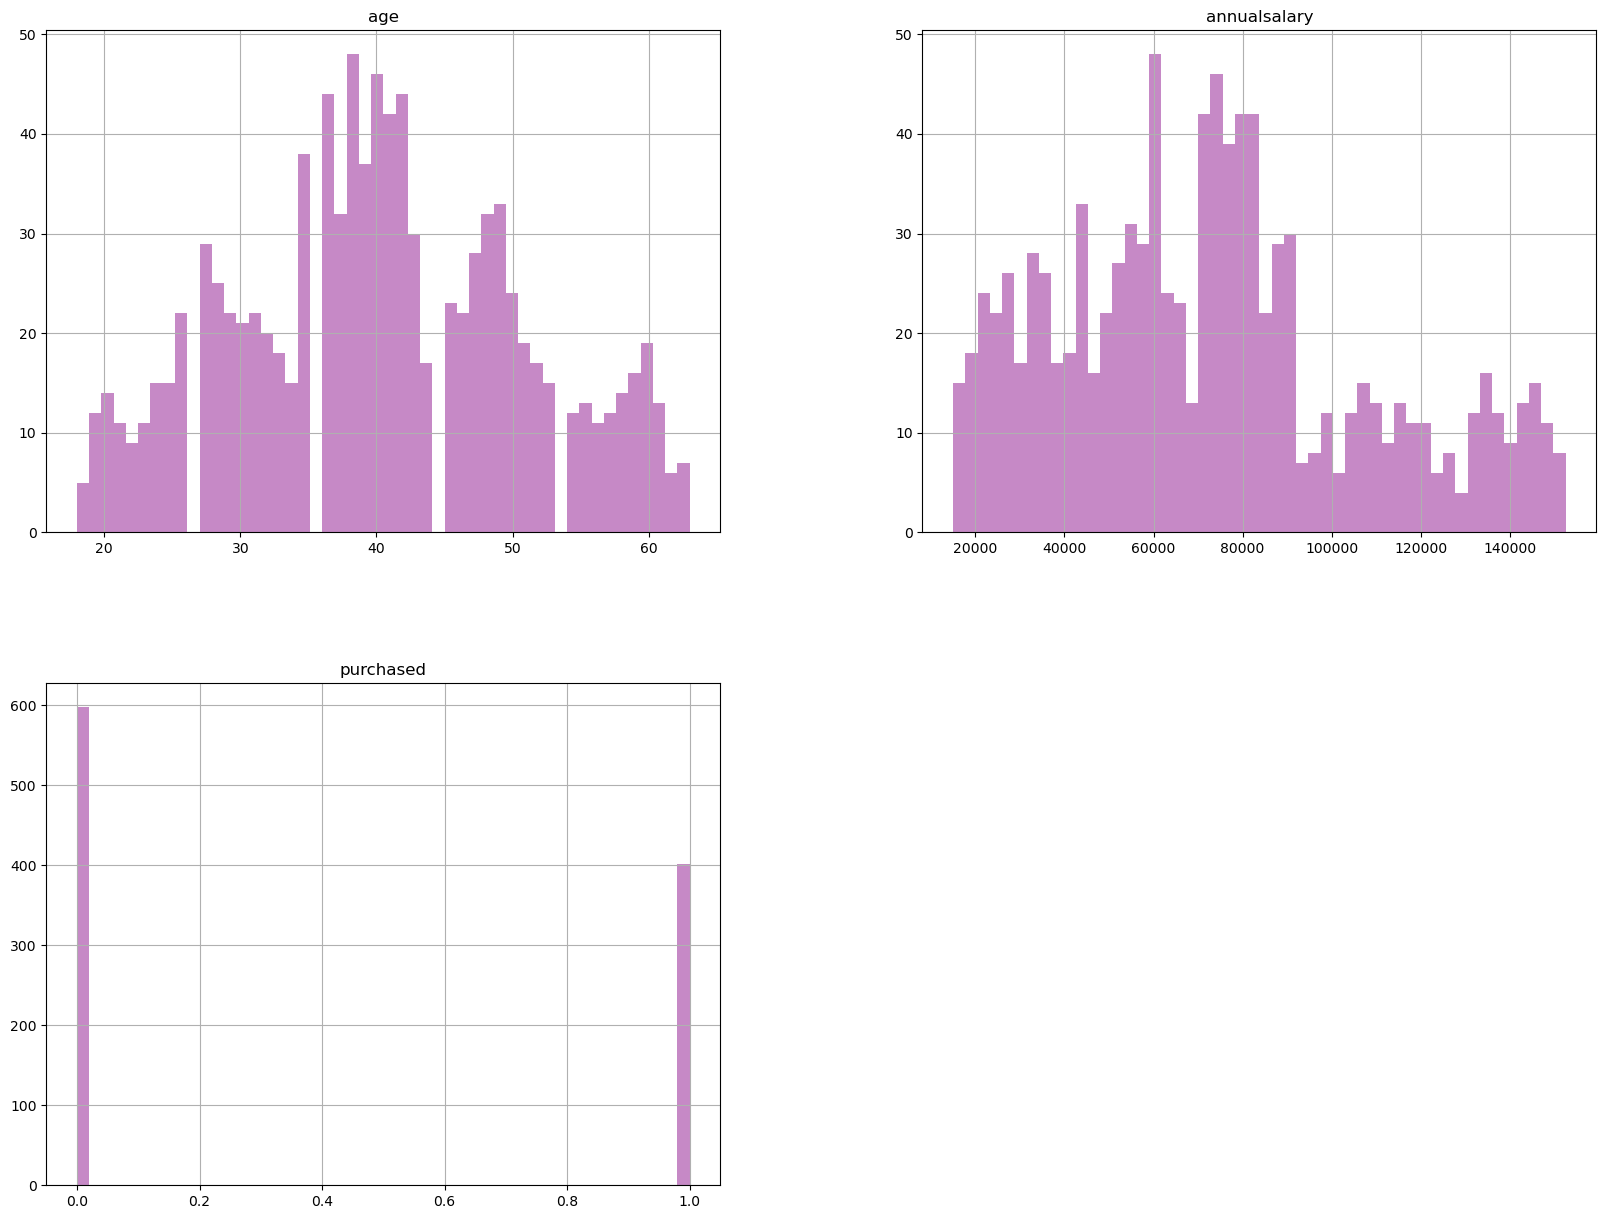

In [188]:
data.hist(bins = 50, figsize = (20,15), color = my_colors[2])

we found that data is non linear 

<AxesSubplot:xlabel='age', ylabel='annualsalary'>

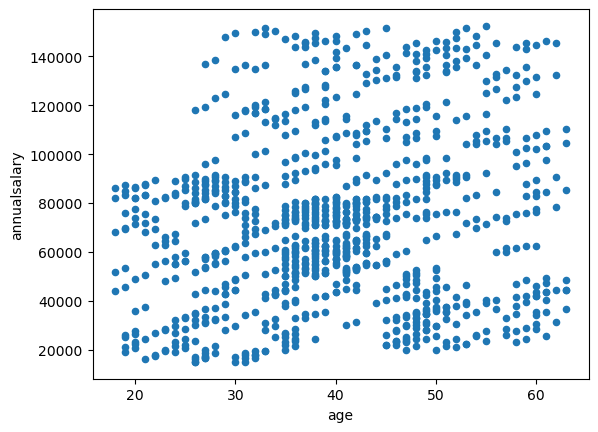

In [189]:
data.plot.scatter(x='age', y='annualsalary')


<AxesSubplot:title={'center':'annualsalary'}, xlabel='purchased'>

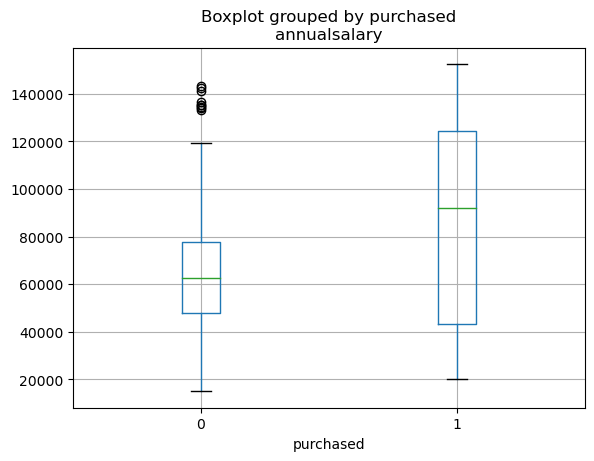

In [190]:
data.boxplot(column='annualsalary', by='purchased')


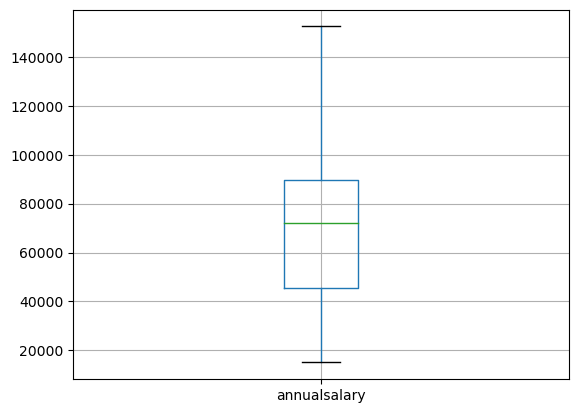

In [219]:
import matplotlib.pyplot as plt

# Plot a box plot of AnnualSalary to visualize outliers

data.boxplot(column='annualsalary')
plt.show()



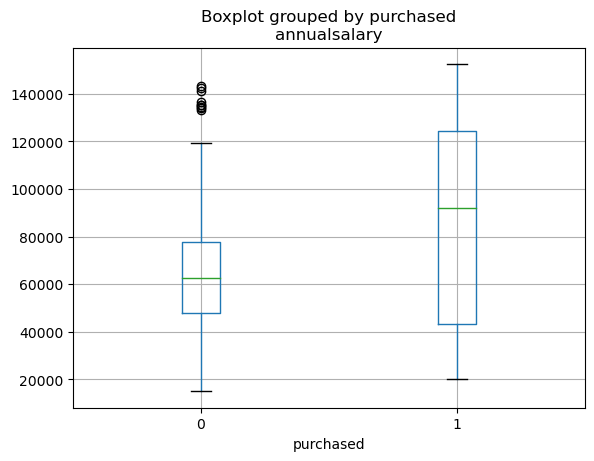

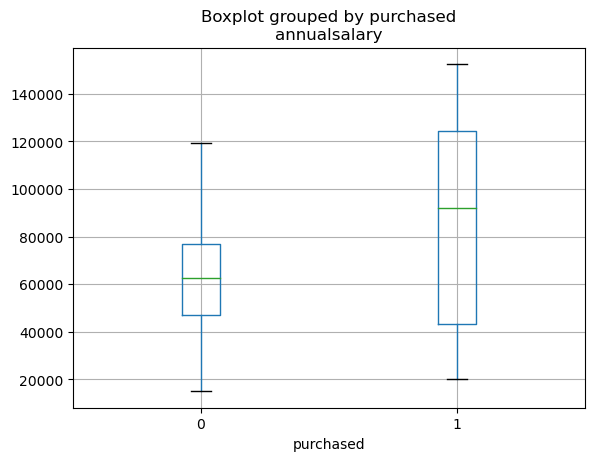

In [192]:
import matplotlib.pyplot as plt

# Plot a box plot of AnnualSalary by Purchased
# we drow the blot box to check the outliers of  annual sallary when the purchased = 0 and the purchased = 1 
data.boxplot(column='annualsalary', by='purchased')
plt.show()

# Remove outliers by filtering the data based on the interquartile range (IQR)
#in this part we remove outliers y ranging the data in the range q1-1.5*IQR<= data <q1+1.5*IQR
grouped = data.groupby('purchased')
data = grouped.apply(lambda x: x[(x['annualsalary'] >= x['annualsalary'].quantile(0.25) - 1.5*(x['annualsalary'].quantile(0.75)-x['annualsalary'].quantile(0.25))) & (x['annualsalary'] <= x['annualsalary'].quantile(0.75) + 1.5*(x['annualsalary'].quantile(0.75)-x['annualsalary'].quantile(0.25)))])

data = data.reset_index(drop=True)

# Plot a box plot of AnnualSalary by Purchased
data.boxplot(column='annualsalary', by='purchased')
plt.show()


In [193]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [194]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])


In [195]:
data

,gender,age,annualsalary,purchased
0,1,41,73500,0
1,1,25,59500,0
2,0,36,63000,0
3,0,41,67500,0
4,1,32,77500,0
...,...,...,...,...
986,1,46,23000,1
987,1,36,99000,1
988,1,47,105000,1
989,0,51,37500,1


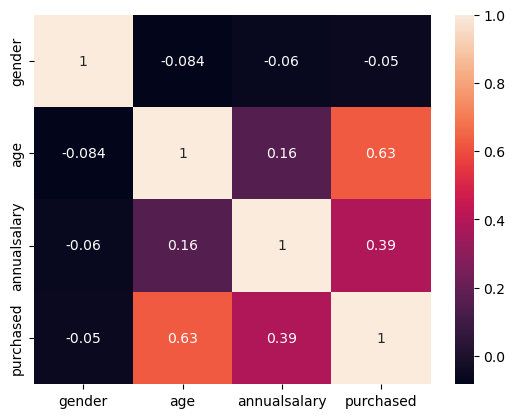

In [196]:
#we find that sallary and prushes has a high correlation using conffusion matrix
sns.heatmap(data.corr(),annot=True)
plt.show()

**splitting data**

In [197]:
y=np.array(data['purchased'])
X=np.array(data.drop('purchased',axis=1))
X_train,x_test,Y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)


In [198]:
X.shape

(991, 3)

*Try Logistic Regression and check its concave and give high accuracy or not 

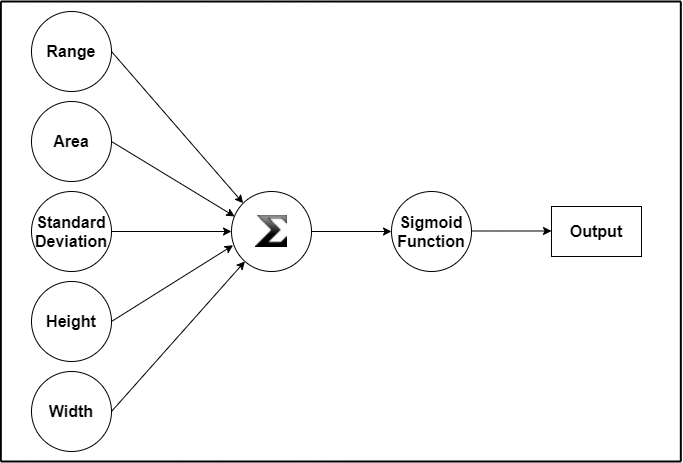
* **NET input =W.X+b**
* **segmoid function = 1/1+e^(-NET INPUT)**
* **ERROR=L(y, y_pred) = -(y * log(y_pred) + (1 - y) * log(1 - y_pred))**

In [199]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

**To get bias**

In [200]:
model.intercept_[0]

-0.0012915773344145249

**TO GET WEIGHTS **

In [201]:
model.coef_[0]

array([-8.18060838e-04, -2.98802136e-03,  1.18779139e-06])

**TRY THE MODEL**

In [202]:
predict=model.predict(x_test)
predict

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0])

**calculate accuracy**

In [203]:
(((predict == y_test).sum())/ len(y_test))*100

63.81909547738693

predict

In [204]:
pred = model.predict(x_test)


In [205]:
pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0])

**TRY IT FROM SCratch to check gradient decend and check thats built infunction and implementation from scratch give high accuracy or not**

In [206]:
import numpy as np

class Logistic_Regression:
    def __init__(self, x, y):
        self.x = x
        self.intercept = 0 
        self.weight = np.random.randn(self.x.shape[1])
        self.y = y

    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient_descent(self, x, h, y):
        return np.dot(x.T, (h - y)) / y.shape[0]

    def fit(self, lr, iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma, self.y)
            dW = self.gradient_descent(self.x, sigma, self.y)
            self.weight -= lr * dW
        print('Fitted successfully to data')

    def predict(self, x_new, threshold=0.5):
        result = self.sigmoid(x_new, self.weight)
        y_pred = np.where(result >= threshold, 1, 0)
        return y_pred


In [207]:
model_X=Logistic_Regression(X_train,Y_train)
model_X.fit(0.001,100000)
predct=model_X.predict(x_test,0.5)

Fitted successfully to data


In [208]:
(((predct == y_test).sum())/ len(y_test))*100

59.2964824120603

AS we have seen the logistic algorithm doesn't converge (give low accuracy )

In [209]:
pred = model.predict(x_test)
report = classification_report(y_test,pred,zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       118
           1       0.59      0.37      0.45        81

    accuracy                           0.64       199
   macro avg       0.62      0.60      0.59       199
weighted avg       0.63      0.64      0.62       199



*we will try Random forest classifier because of 
* High accuracy: Random Forest can achieve high accuracy in both classification and regression tasks by averaging the predictions of multiple decision trees, thereby reducing the variance and overfitting of the model.

Robustness: Random Forest is less sensitive to outliers and noise in the data compared to other models, making it more robust and stable.

Non-parametric: Random Forest is a non-parametric model, which means it can handle complex, non-linear relationships between the features and the target variable without making any assumptions about the data distribution.

Feature importance: Random Forest provides a measure of feature importance, which can be used for feature selection or feature engineering. This can help to reduce the dimensionality of the data and improve the performance of the model.

Scalability: Random Forest can be easily parallelized and distributed, making it scalable to large datasets and computationally efficient.

Versatility: Random Forest can be used for both classification and regression tasks, as well as for unsupervised learning tasks such as outlier detection and clustering.

Random Forest classifier model

In [210]:
# y=np.array(data['purchased'])
# X=np.array(data.drop('purchased',axis=1))
# X_train,x_test,Y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)
# y.shape

in Random forest we didnt need features selection 

In [211]:
# Define and fit Model

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier()

prediect

In [212]:
randomforest_predictions = model.predict(x_test)


In [213]:
randomforest_predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1])

In [214]:
mae = mean_absolute_error(randomforest_predictions, y_test)
print("Mean Absolute Error with  Random Forest classifier:" , mae)

Mean Absolute Error with  Random Forest classifier: 0.11055276381909548


In [215]:
accuracy =accuracy_score(y_test,randomforest_predictions)
print('Accuracy for Random Forest classifier model is - ', accuracy)

Accuracy for Random Forest classifier model is -  0.8894472361809045


In [216]:
precision_score = precision_score(y_test, randomforest_predictions, labels=model.classes_)
print("Precision score for Random Forest Classifier is  ", precision_score)

Precision score for Random Forest Classifier is   0.8554216867469879


In [217]:
#Classification Report

clf_report = classification_report(y_test, randomforest_predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       118
           1       0.86      0.88      0.87        81

    accuracy                           0.89       199
   macro avg       0.88      0.89      0.89       199
weighted avg       0.89      0.89      0.89       199



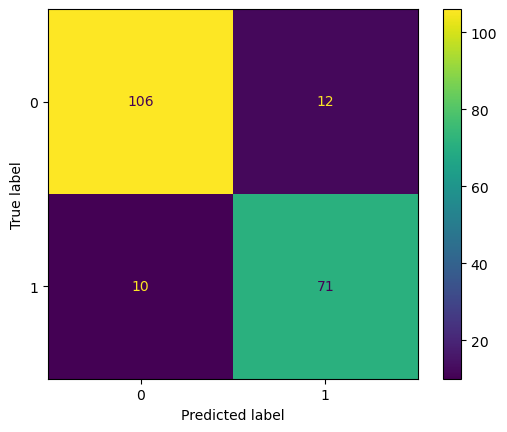

In [218]:
#Confusion Matrix

cm = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
